In [1]:
import sys; sys.path.append('../')

In [2]:
from nn.trainer import Trainer
from nn.net import Net
from nn.layers.fully_connected import  FullyConnected
from nn.layers.batch_normalization import BatchNormalization
from nn.layers.sigmoid import Sigmoid

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Data preparation

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

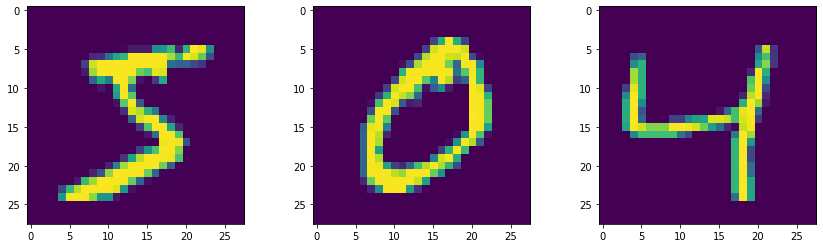

In [9]:
plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(X_train[0])

plt.subplot(1, 3, 2)
plt.imshow(X_train[1])

plt.subplot(1, 3, 3)
plt.imshow(X_train[2])

plt.subplots_adjust(right=2)
plt.show()

In [10]:
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))
y_train.resize((y_train.shape[0],1))
y_test.resize((y_test.shape[0],1))

In [11]:
train_rows = 5000
test_rows = 1000
X_train = X_train[:train_rows]
X_test = X_test[:test_rows]
y_train = y_train[:train_rows]
y_test = y_test[:test_rows]

In [12]:
X_train_1 = []
X_test_1 = []
y_train_1 = []
y_test_1 = []

for i in range(train_rows):
    if y_train[i][0] == 1:
        X_train_1.append(X_train[i])
        y_train_1.append([1])
    if y_train[i][0] == 8:
        X_train_1.append(X_train[i])
        y_train_1.append([0])

for i in range(test_rows):
    if y_test[i][0] == 1:
        X_test_1.append(X_test[i])
        y_test_1.append([1])
    if y_test[i][0] == 8:
        X_test_1.append(X_test[i])
        y_test_1.append([0])

y_train = np.array(y_train_1)
y_test = np.array(y_test_1)
X_test = np.array(X_test_1)
X_train = np.array(X_train_1)

In [13]:
X_train.shape

(1025, 784)

In [14]:
X_test.shape

(215, 784)

In [15]:
y_train.shape

(1025, 1)

In [16]:
y_test.shape

(215, 1)

In [17]:
pd.Series(y_train.T[0]).value_counts()

1    563
0    462
dtype: int64

In [18]:
pd.Series(y_test.T[0]).value_counts()

1    126
0     89
dtype: int64

In [19]:
X_train = X_train / 255
X_test = X_test / 255

Net 

In [20]:
net = Net(
    layers=(
        FullyConnected(
            'fc_hidden',
            n_inputs=28*28,
            n_neurons=64,
        ),
        BatchNormalization(
            'bn_hidden',
            64
        ),
        Sigmoid(
            'sigmoid_hidden',
            n_inputs=64,
        ),
        FullyConnected(
            'fc_output',
            n_inputs=64,
            n_neurons=1,
        ),
        BatchNormalization(
            'bn_hidden',
            1
        ),
        Sigmoid(
            'sigmoid_output',
            n_inputs=1,
        )
    )
)

Trainig

In [21]:
trainer = Trainer(net=net)

In [22]:
trainer.train(
    X_train=X_train,
    y_train=y_train,
    batch_size=25,
    epochs=5,
    lr=0.1
)

Epoch 5: 100%|██████████| 41/41 [00:00<00:00, 43.11it/s]


Predict

In [23]:
y_pred = trainer.predict(
    X_test=X_test
)
y_pred = np.resize(y_pred, (y_pred.shape[2], 1))

MSE

In [24]:
np.sum((y_pred-y_test)**2)

25.22274068850148

Accuracy and recall

In [25]:
y_pred = np.resize(y_pred, (y_pred.shape[0]))
y_pred = np.where(y_pred > 0.5, 1, 0).astype('int') 

In [26]:
y_test = np.resize(y_test, (y_test.shape[0])).astype('int') 

In [27]:
accuracy_score(y_test, y_pred)

0.9302325581395349

In [28]:
recall_score(y_test, y_pred)

0.9285714285714286

Predicted and test classes

In [29]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [30]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])